In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, geopandas as gpd, datetime, glob, math, openpyxl
import matplotlib.pyplot as plt, matplotlib.dates as mdates
from statistics import mean
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams['figure.dpi'] = 300

In [2]:
# set the filepath and load in a shapefile
fp = "./output_test.shp"
merged = gpd.read_file(fp)

In [3]:
merged.columns

Index(['LAD21NM', 'OBJECTID', 'LAD21CD', 'BNG_E', 'BNG_N', 'LONG', 'LAT',
       'Shape__Are', 'Shape__Len', 'area code', 'Cumulative', 'IMD_ Overa',
       'IMD_ Barri', 'IMD_ Crime', 'IMD_ Educa', 'IMD_ Emplo', 'IMD_ Healt',
       'IMD_ Incom', 'IMD_ Livin', 'Cumulati_1', 'Cumulati_2', 'Total popu',
       'Cumulati_3', 'Cumulati_4', 'Cumulati_5', 'IMD_ Ove_1', 'Cumulati_6',
       'Cumulati_7', 'IMD_ Ove_2', 'Cumulati_8', 'IMD_ Ove_3', 'IMD_ Ove_4',
       'geometry'],
      dtype='object')

In [4]:
merged.columns = ['LAD21NM', 'OBJECTID', 'LAD21CD', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'Shape__Are','Shape__Len', 
                  'area code', 'Cumulative confirmed cases', 
                  'IMD: Overall - extent (%)',
                  'IMD: Barriers to Housing and Services',
                  'IMD: Crime',
                  'IMD: Education Skills and Training Deprivation',
                  'IMD: Employment',
                  'IMD: Health Deprivation and Disability',
                  'IMD: Income Deprivation',
                  'IMD: Living Environment Deprivation',
                  'Cumulative 1st dose', 'Cumulative 2nd dose','Total population', 
                  'Cumulative 1st dose per 100k', 'Cumulative 2nd dose per 100k', 
                  'Cumulative confirmed cases per 100k','IMD: Overall - extent (%) per 100k', 
                  'Cumulative 1st dose by Cumulative 2nd dose','Cumulative 1st dose by Cumulative confirmed cases', 
                  'IMD: Overall - extent (%) by Cumulative 1st dose', 
                  'Cumulative 2nd dose by Cumulative confirmed cases', 
                  'IMD: Overall - extent (%) by Cumulative 2nd dose', 
                  'IMD: Overall - extent (%) by Cumulative confirmed cases', 'geometry']
merged = merged.set_index('LAD21NM')

In [5]:
merged.columns

Index(['OBJECTID', 'LAD21CD', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'Shape__Are',
       'Shape__Len', 'area code', 'Cumulative confirmed cases',
       'IMD: Overall - extent (%)', 'IMD: Barriers to Housing and Services',
       'IMD: Crime', 'IMD: Education Skills and Training Deprivation',
       'IMD: Employment', 'IMD: Health Deprivation and Disability',
       'IMD: Income Deprivation', 'IMD: Living Environment Deprivation',
       'Cumulative 1st dose', 'Cumulative 2nd dose', 'Total population',
       'Cumulative 1st dose per 100k', 'Cumulative 2nd dose per 100k',
       'Cumulative confirmed cases per 100k',
       'IMD: Overall - extent (%) per 100k',
       'Cumulative 1st dose by Cumulative 2nd dose',
       'Cumulative 1st dose by Cumulative confirmed cases',
       'IMD: Overall - extent (%) by Cumulative 1st dose',
       'Cumulative 2nd dose by Cumulative confirmed cases',
       'IMD: Overall - extent (%) by Cumulative 2nd dose',
       'IMD: Overall - extent (%) by Cumulat

In [6]:
pop_la_df = merged['Total population']

In [7]:
merged.iloc[:,10:]

,IMD: Overall - extent (%),IMD: Barriers to Housing and Services,IMD: Crime,IMD: Education Skills and Training Deprivation,IMD: Employment,IMD: Health Deprivation and Disability,IMD: Income Deprivation,IMD: Living Environment Deprivation,Cumulative 1st dose,Cumulative 2nd dose,...,Cumulative 2nd dose per 100k,Cumulative confirmed cases per 100k,IMD: Overall - extent (%) per 100k,Cumulative 1st dose by Cumulative 2nd dose,Cumulative 1st dose by Cumulative confirmed cases,IMD: Overall - extent (%) by Cumulative 1st dose,Cumulative 2nd dose by Cumulative confirmed cases,IMD: Overall - extent (%) by Cumulative 2nd dose,IMD: Overall - extent (%) by Cumulative confirmed cases,geometry
LAD21NM,,,,,,,,,,,,,,,,,,,,,
Hartlepool,49.7,0.00,32.76,20.69,43.10,36.21,37.93,0.00,64622.0,54890.0,...,56002.775142,12797.281993,50.707559,1.177300,5.152037,0.000769,4.376146,0.000905,0.003962,"POLYGON ((447213.899 537036.104, 447228.798 53..."
Middlesbrough,57.1,0.00,45.35,39.53,48.84,56.98,50.00,0.00,95410.0,79042.0,...,48944.536296,11528.673069,35.357570,1.207080,5.124611,0.000598,4.245461,0.000722,0.003067,"POLYGON ((448489.897 522071.798, 448592.597 52..."
Redcar and Cleveland,36.3,0.00,13.64,19.32,32.95,35.23,26.14,1.14,99532.0,86616.0,...,60734.144375,10693.826035,25.453143,1.149118,6.526261,0.000365,5.679365,0.000419,0.002380,"POLYGON ((455525.931 528406.654, 455724.632 52..."
Stockton-on-Tees,30.2,1.67,10.00,16.67,20.83,28.33,21.67,0.00,138255.0,117359.0,...,56724.216265,11176.737846,14.596847,1.178052,5.978853,0.000218,5.075203,0.000257,0.001306,"POLYGON ((444157.002 527956.304, 444165.898 52..."
Darlington,28.9,3.08,29.23,20.00,18.46,24.62,18.46,0.00,77557.0,65740.0,...,57672.231531,9904.464466,25.353324,1.179754,6.869531,0.000373,5.822852,0.000440,0.002560,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sutton,5.8,0.83,0.00,0.83,2.48,0.00,2.48,0.83,139843.0,119723.0,...,53108.254374,8730.348841,2.572838,1.168055,7.105482,0.000041,6.083177,0.000048,0.000295,"POLYGON ((527085.942 167617.691, 527087.728 16..."
Tower Hamlets,30.6,6.94,21.53,0.69,0.69,1.39,15.28,13.89,201893.0,147022.0,...,37871.867989,9249.141571,7.882352,1.373216,5.622821,0.000152,4.094636,0.000208,0.000852,"POLYGON ((536776.386 184446.881, 536777.600 18..."
Waltham Forest,17.8,47.92,4.17,0.00,2.08,0.00,6.94,16.67,163463.0,133729.0,...,40843.009938,9143.857163,5.436409,1.222345,5.459868,0.000109,4.466716,0.000133,0.000595,"POLYGON ((537921.098 196048.201, 537947.499 19..."


C:\Users\joshb\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


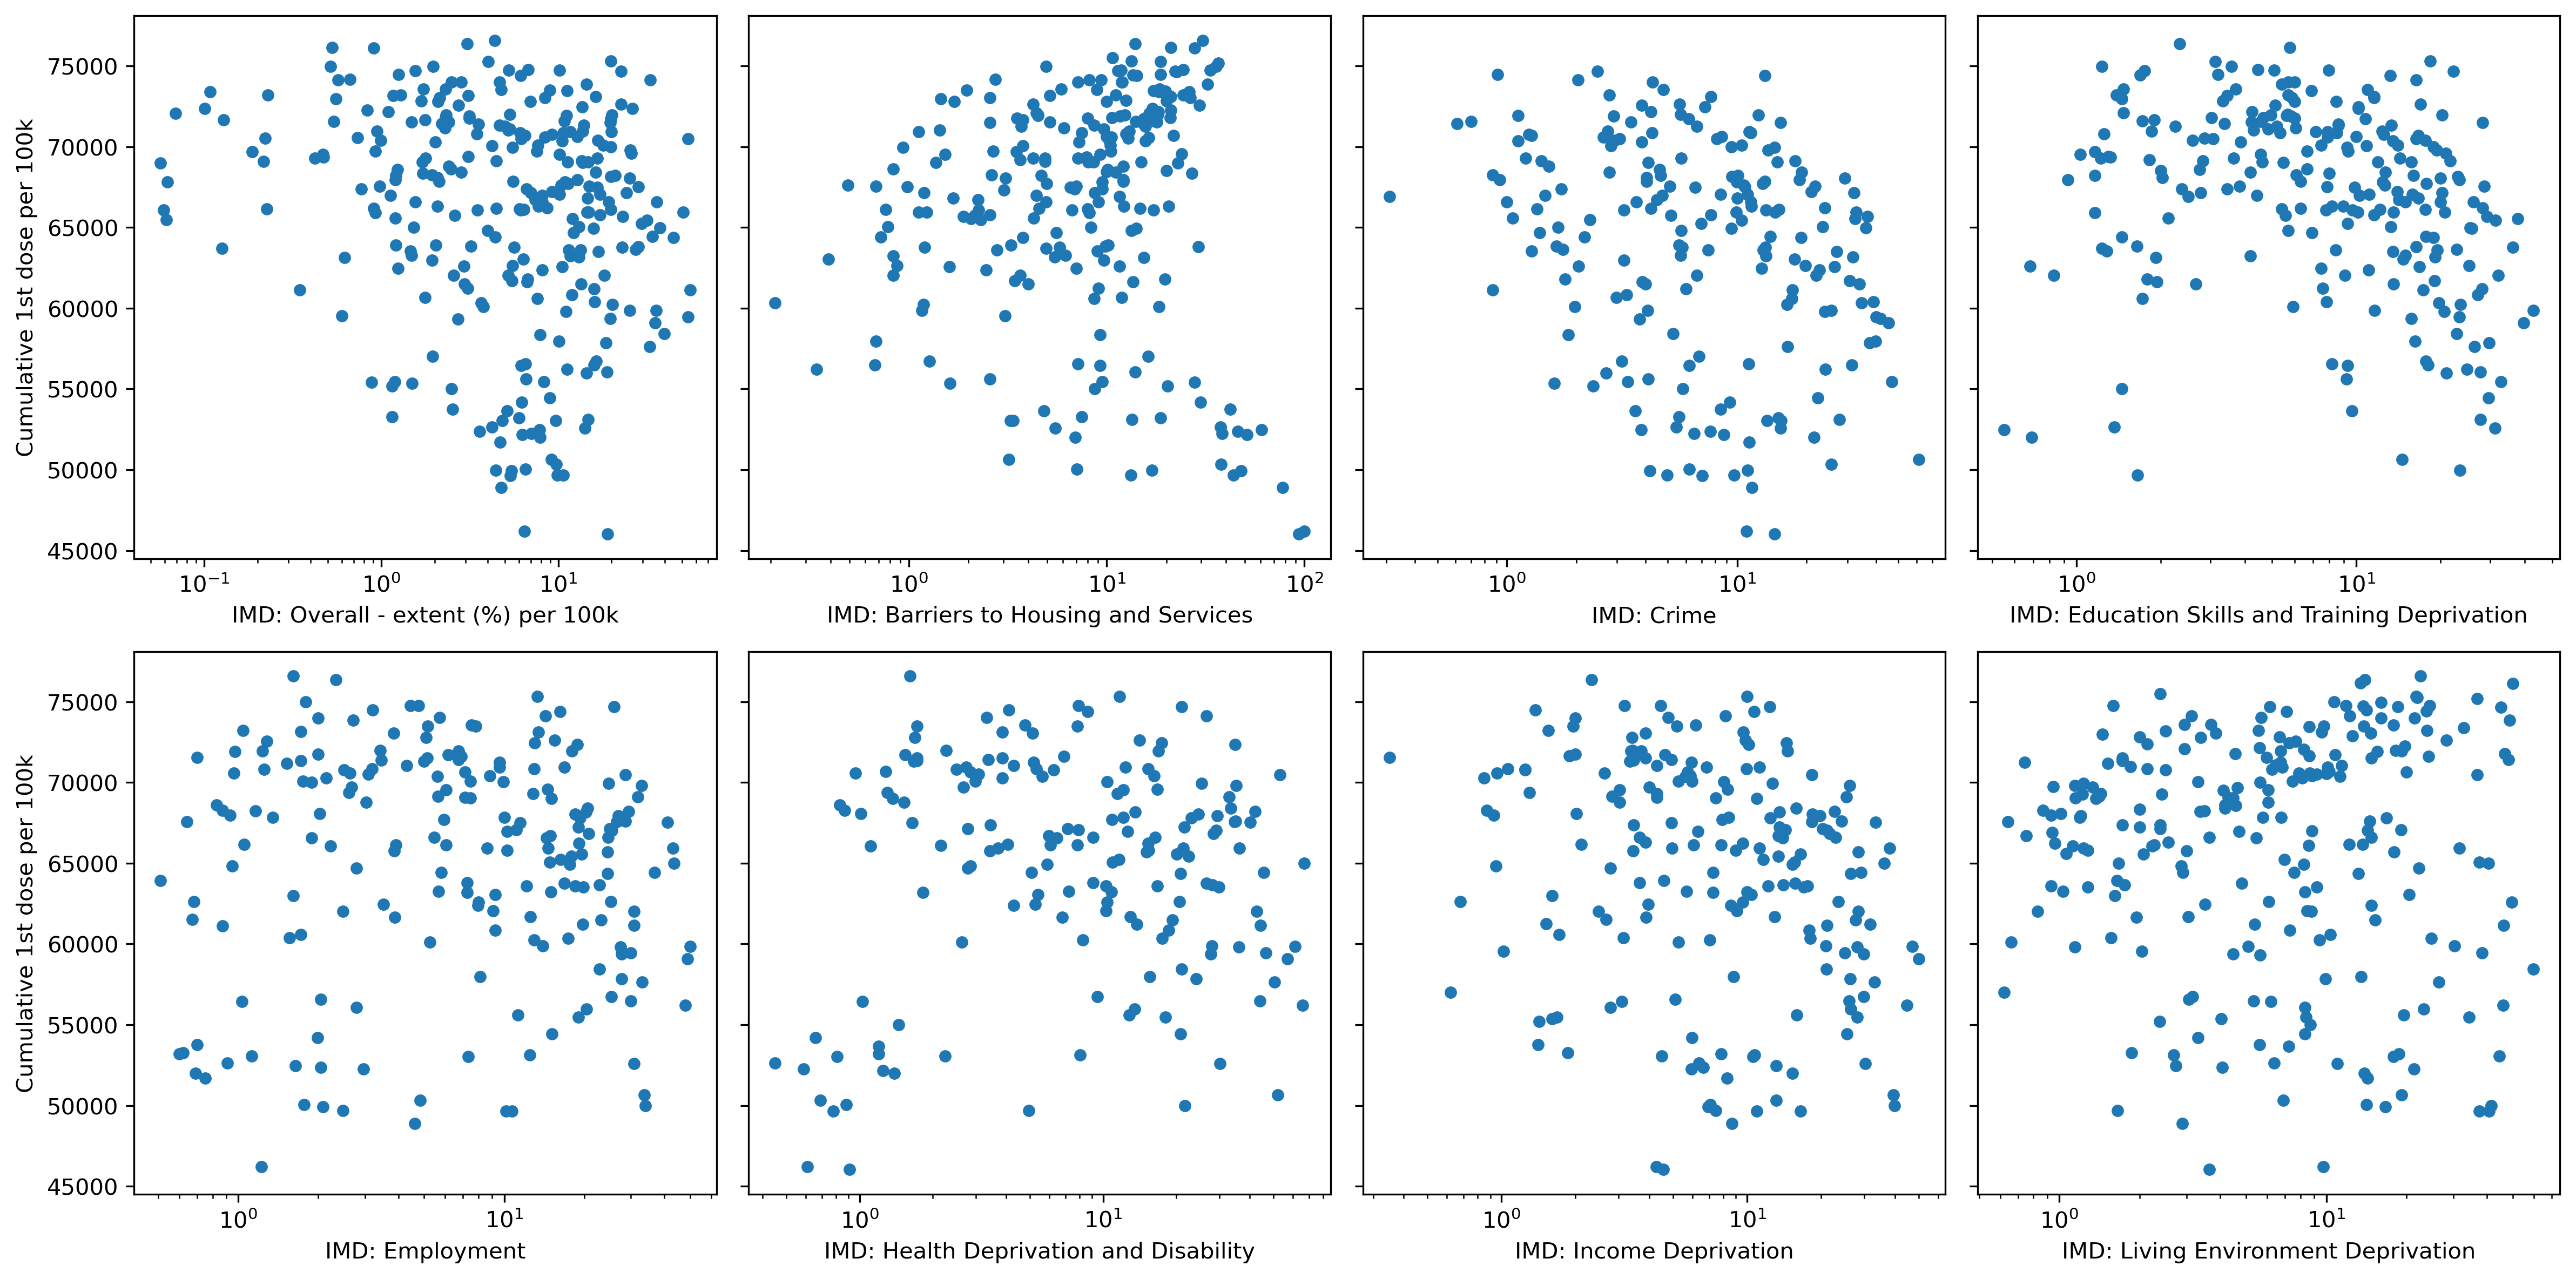

In [8]:
#create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,8),sharey=True, tight_layout=True)
#for i in range(2):
#    for j in range(4):
#        axes[i][j].invert_xaxis()

# plot first pandas frame in subplot style
merged.plot.scatter('IMD: Overall - extent (%) per 100k','Cumulative 1st dose per 100k',ax = axes[0][0],subplots=True,
                    logx=True)

# plot second pandas frame in subplot style
merged.plot.scatter('IMD: Barriers to Housing and Services', 'Cumulative 1st dose per 100k',ax = axes[0][1], subplots=True, logx=True)

# plot third pandas frame in subplot style
merged.plot.scatter('IMD: Crime', 'Cumulative 1st dose per 100k',ax = axes[0][2], subplots=True, logx=True)

# plot third pandas frame in subplot style
merged.plot.scatter('IMD: Education Skills and Training Deprivation', 'Cumulative 1st dose per 100k',ax = axes[0][3], subplots=True, logx=True)

# plot third pandas frame in subplot style
merged.plot.scatter('IMD: Employment', 'Cumulative 1st dose per 100k',ax = axes[1][0], subplots=True, logx=True)

# plot third pandas frame in subplot style
merged.plot.scatter('IMD: Health Deprivation and Disability', 'Cumulative 1st dose per 100k',ax = axes[1][1], subplots=True, logx=True)

# plot third pandas frame in subplot style
merged.plot.scatter('IMD: Income Deprivation', 'Cumulative 1st dose per 100k',ax = axes[1][2], subplots=True, logx=True)

# plot third pandas frame in subplot style
merged.plot.scatter('IMD: Living Environment Deprivation', 'Cumulative 1st dose per 100k',ax = axes[1][3], subplots=True, logx=True)

plt.savefig('./Desktop/MSc Project/Outputs/IMD metrics vs cumulative vaccine rate per 100k.png')
plt.show()

In [9]:
cols = ['IMD: Overall - extent (%)',
        'IMD: Barriers to Housing and Services',
        'IMD: Crime',
        'IMD: Education Skills and Training Deprivation',
        'IMD: Employment',
        'IMD: Health Deprivation and Disability',
        'IMD: Income Deprivation',
        'IMD: Living Environment Deprivation',]

cor_nums = {}

for col in cols:
    col1 = col
    col2 = 'Cumulative 1st dose per 100k'
    df1 = merged[[col1,col2]]
    cor_num = df1.corr(method='pearson').iloc[1][0]
    cor_nums[col1] = -cor_num
#    print('Pearsons correlation coefficient for', col1, 'and' , col2, ':', "{:.2f}".format(cor_num))
    
vac1_by_imd_cor_nums_df = pd.DataFrame.from_dict(orient='index', data=cor_nums)
vac1_by_imd_cor_nums_df.columns = ['Pearsons correlation coefficient against Cumulative 1st dose per 100k']
vac1_by_imd_cor_nums_df = vac1_by_imd_cor_nums_df.sort_values(by='Pearsons correlation coefficient against Cumulative 1st dose per 100k')

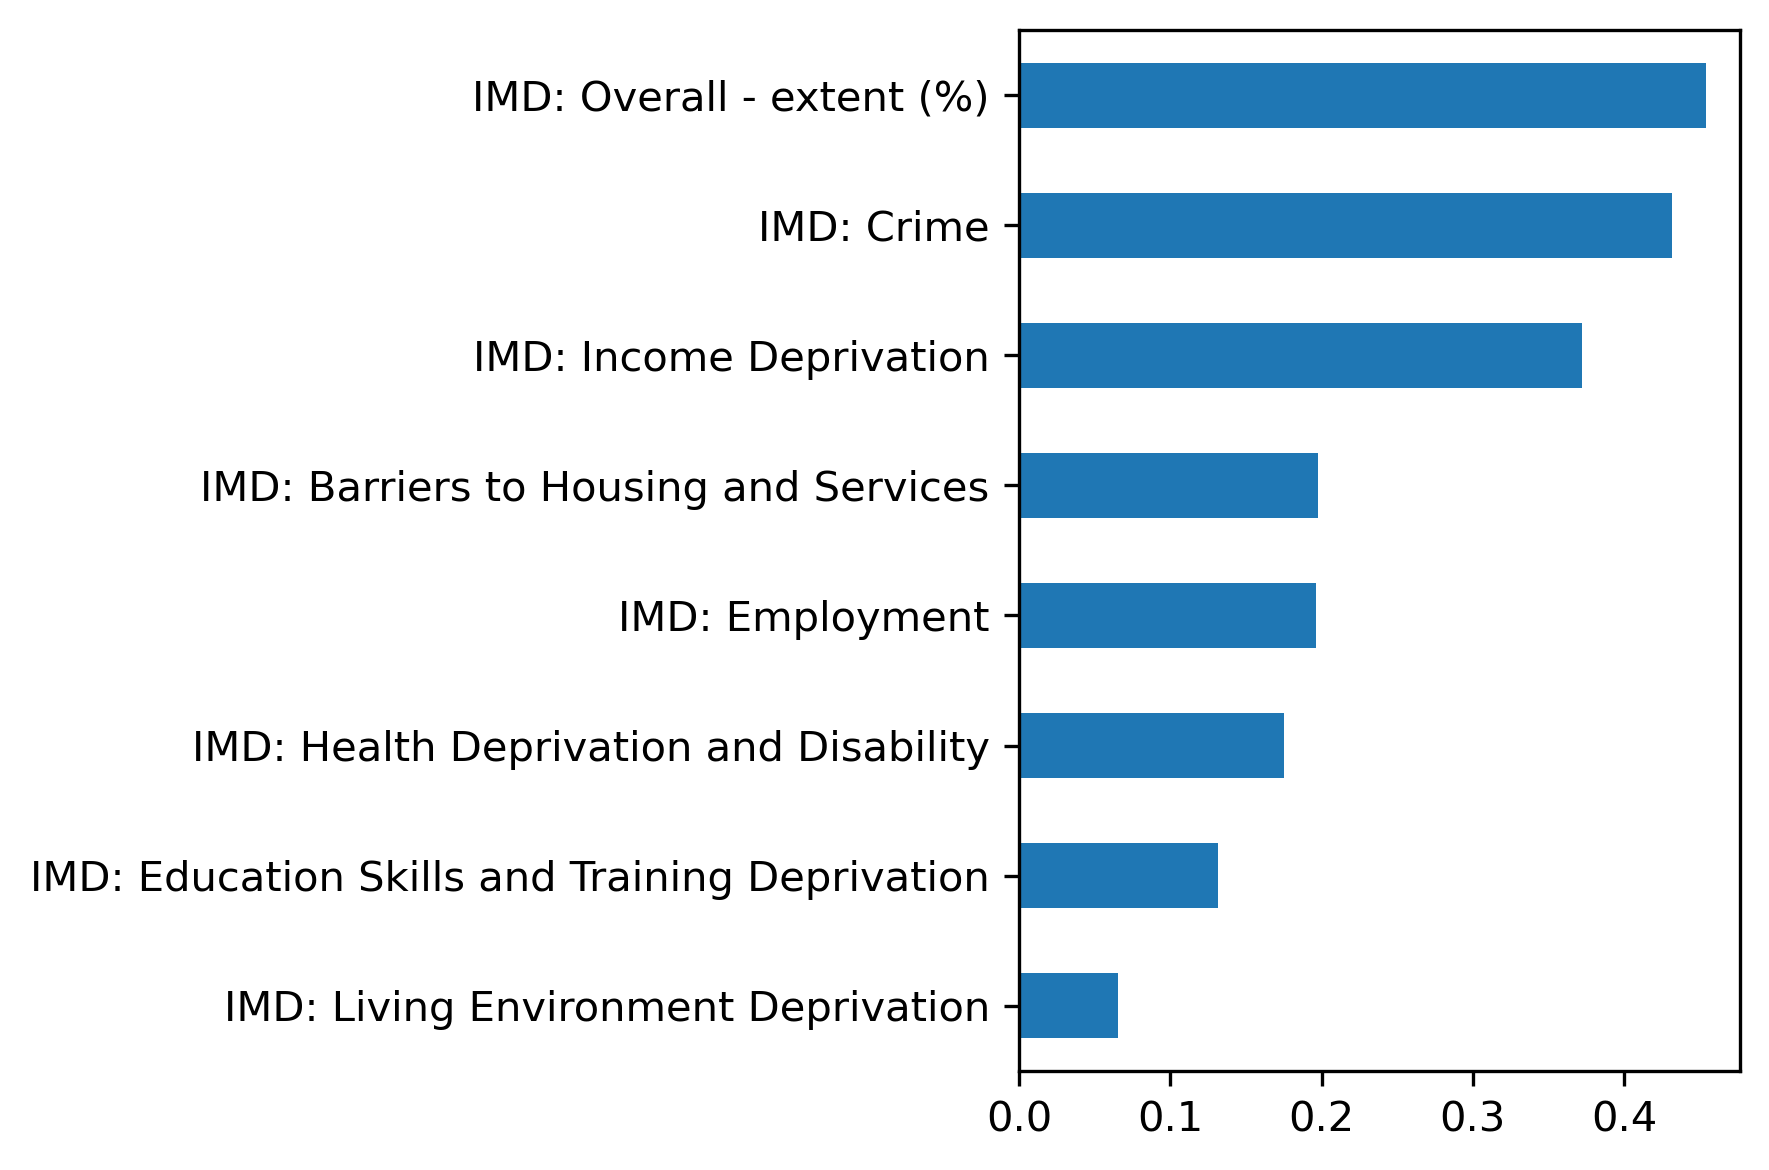

In [10]:
title='Pearsons Correlation coefficient for Cumulative 1st dose per 100k compared to IMD metrics'

vac1_by_imd_cor_nums_df.plot.barh(legend=None)

plt.tight_layout()
plt.savefig('./Desktop/MSc Project/Outputs/' + title + '.png')

plt.show()

#### Rates per Dates

Collecting weekly vaccine data for local authority and creating a hesistancy measure.

In [11]:
#import the data. Vaccine numbers by LA per week
all_weekly_data = []
all_weekly_dates = []
all_weekly_pop_data = []

for i,f in enumerate(glob.glob("C:/Users/joshb/Desktop/MSc Project/Data/PHE/Weekly/Full data/*.xlsx")):
    
    all_weekly_dates.append(list(pd.read_excel(f, engine='openpyxl', sheet_name='LTLA',
                                      index_col=None, usecols = "C", header = 6, nrows=0).columns)[0])
    
    all_weekly_data.append(pd.read_excel(f, engine='openpyxl', sheet_name='LTLA',header=[10,11]))
    
    all_weekly_pop_data.append(pd.read_excel(f, engine='openpyxl', sheet_name='Population estimates (NIMS)',
                                             header=[11,12]))
    
    if i%1==0:
        print(i+10, end=' ')

10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 

In [12]:
#zip dates and data
weekly_la_data1 = list(zip(all_weekly_dates,all_weekly_data))
weekly_la_pop_data1 = list(zip(all_weekly_dates,all_weekly_pop_data))

In [13]:
weekly_la_data = weekly_la_data1.copy()

for i,df in enumerate([tup[1] for tup in weekly_la_data1]):
    weekly_la_data[i][1].columns = weekly_la_data1[i][1].columns.to_flat_index()
    weekly_la_data[i][1].columns = weekly_la_data1[i][1].columns.to_series().astype(str).str.lower()
    weekly_la_data[i] = (weekly_la_data1[i][0],
                         weekly_la_data1[i][1].set_index(
                             weekly_la_data1[i][1].filter(like='ltla name', axis=1).columns[0]))

In [14]:
for i,df in enumerate([tup[1] for tup in weekly_la_data]):
    weekly_la_data[i] = (weekly_la_data[i][0],weekly_la_data[i][1].loc[weekly_la_data[i][1].index.dropna()])

In [15]:
weekly_la_pop_data = weekly_la_pop_data1.copy()

for i,df in enumerate([tup[1] for tup in weekly_la_pop_data1]):
    #print(i)
    weekly_la_pop_data[i][1].columns = weekly_la_pop_data1[i][1].columns.to_flat_index()
    weekly_la_pop_data[i][1].columns = weekly_la_pop_data1[i][1].columns.to_series().astype(str).str.lower()
    weekly_la_pop_data[i] = (weekly_la_pop_data1[i][0],
                             weekly_la_pop_data1[i][1].set_index(
                                 weekly_la_pop_data1[i][1][
                                     weekly_la_pop_data1[i][1].filter(like='ltla name', axis=1).columns].iloc[:,0]))

In [16]:
for i,df in enumerate([tup[1] for tup in weekly_la_pop_data]):
    weekly_la_pop_data[i] = (weekly_la_pop_data[i][0],weekly_la_pop_data[i][1].loc[weekly_la_pop_data[i][1].index.dropna()])

In [17]:
weekly_la_vac1_pop_data1 = []

for i,df in enumerate([tup[1] for tup in weekly_la_pop_data]):
    df1 = weekly_la_pop_data[i][1].filter(like='population estimates', axis=1)
    df1.columns = [tup[26:-2] for tup in df1.columns]
    df2 = df1[df1.columns[~df1.columns.str.contains('\.')]]
    df2.index.name = df2.index.name[0]
    df3 = df2.drop(columns=['18+','16+'], errors='ignore')
    weekly_la_vac1_pop_data1.append(df3)
    
weekly_la_vac1_pop_data = list(zip(all_weekly_dates,weekly_la_vac1_pop_data1))

In [18]:
weekly_la_vac1_pop_data5 = []

for i,df1 in enumerate([tup[1] for tup in weekly_la_vac1_pop_data]):
    weekly_la_vac1_pop_data[i][1]['Total'] = weekly_la_vac1_pop_data[i][1].sum(axis=1)
    df = weekly_la_vac1_pop_data[i][1]['Total']
    df.name = weekly_la_vac1_pop_data[i][0]
    weekly_la_vac1_pop_data5.append(df)

In [19]:
complete_weekly_la_vac1_pop_data =  pd.concat(weekly_la_vac1_pop_data5,axis=1)
complete_weekly_la_vac1_pop_data.head(3)

,4th March 2021,11th March 2021,18th March 2021,25th March 2021,1st April 2021,8th April 2021,15th April 2021,22nd April 2021,29th April 2021,6th May 2021,...,17th June 2021,24th June 2021,1st July 2021,8th July 2021,15th July 2021,22nd July 2021,29th July 2021,5th August 2021,12th August 2021,19th August 2021
Amber Valley,129930.0,129951.0,129956.0,130001.0,130042.0,130086.0,130108.0,130150.0,130165.0,130192.0,...,130402.0,130448.0,130494.0,130517.0,130549.0,130561.0,130591.0,130625.0,130631.0,130691.0
Ashfield,130379.0,130338.0,130386.0,130377.0,130402.0,130402.0,130434.0,130420.0,130404.0,130455.0,...,130627.0,130623.0,130646.0,130698.0,130705.0,130713.0,130730.0,130758.0,130774.0,130809.0
Bassetlaw,124078.0,124148.0,124175.0,124282.0,124303.0,124371.0,124379.0,124422.0,124503.0,124488.0,...,124825.0,124928.0,125074.0,125089.0,125122.0,125243.0,125243.0,125241.0,125202.0,125249.0


In [20]:
weekly_la_vac1_data1 = []

for df in [tup[1] for tup in weekly_la_data]:
    df.columns = df.columns.to_flat_index()
    df1 = df.filter(like='1st', axis=1)
    weekly_la_vac1_data1.append(df1)

In [21]:
weekly_la_vac1_data2 = []

for df in [tup[1] for tup in weekly_la_data]:
    df.columns = df.columns.to_flat_index()
    df1 = df.filter(like='at least 1', axis=1)
    weekly_la_vac1_data2.append(df1)

In [22]:
weekly_la_vac1_data1 = weekly_la_vac1_data1[8:]
weekly_la_vac1_data2 = weekly_la_vac1_data2[:8]
weekly_la_vac1_data3 = weekly_la_vac1_data2 + weekly_la_vac1_data1
weekly_la_vac1_data3 = list(zip(all_weekly_dates,weekly_la_vac1_data3))

In [23]:
#ENTIRE BLOCK NEEDS REWRITING

weekly_la_vac1_data4 = []

for i,df in enumerate([tup[1] for tup in weekly_la_vac1_data3]):
    
    #replace random * in data with np.NaN
    df = df.replace('*',np.NaN)
    
    #convert all values to floats
    df.apply(pd.to_numeric,downcast='float')
    
    print(i,end=' ')
    
    #make sure all column names are in lower case
    df.columns = df.columns.to_series().astype(str).str.lower()
    
    #get rid of any columns that contain a '.'
    df = df[df.columns[~df.columns.str.contains('\.')]]
    
    #get rid of any columns that contain a 'unnamed'
    df = df[df.columns[~df.columns.str.contains('unnamed')]]
    
    #rename the index
    df.index.name = 'LTLA Name'
    
    #create a sum column
    df['Total'] = df.sum(axis=1)
    
    #create a dataframe of just the sum column
    df1 = df['Total'].copy()
    
    #list of weekly sums
    weekly_la_vac1_data4.append(df1)
    
weekly_la_vac1_data5 = list(zip(all_weekly_dates,weekly_la_vac1_data4))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

In [24]:
for i,df in enumerate([tup[1] for tup in weekly_la_vac1_data5]):
    weekly_la_vac1_data5[i][1].name = weekly_la_vac1_data5[i][0]

In [25]:
complete_weekly_la_vac1_data = pd.concat([tup[1] for tup in weekly_la_vac1_data5],axis=1)
complete_weekly_la_vac1_data.head(3)

,4th March 2021,11th March 2021,18th March 2021,25th March 2021,1st April 2021,8th April 2021,15th April 2021,22nd April 2021,29th April 2021,6th May 2021,...,17th June 2021,24th June 2021,1st July 2021,8th July 2021,15th July 2021,22nd July 2021,29th July 2021,5th August 2021,12th August 2021,19th August 2021
Amber Valley,43827.0,48461.0,53175.0,63010.0,70437.0,72438.0,74401.0,74923.0,75999.0,76620.0,...,86624.0,89434.0,91691.0,92969.0,93578.0,93930.0,94275.0,94590.0,95039.0,95453.0
Ashfield,45910.0,50230.0,53466.0,61065.0,65335.0,66459.0,66942.0,68195.0,68921.0,69732.0,...,80734.0,83428.0,85803.0,86880.0,87365.0,87762.0,88181.0,88456.0,88717.0,89155.0
Bassetlaw,41137.0,45700.0,48452.0,57092.0,61942.0,63187.0,67211.0,67858.0,69245.0,69843.0,...,79639.0,81221.0,83845.0,84767.0,85272.0,85611.0,85946.0,86234.0,86436.0,86785.0


In [26]:
complete_weekly_la_vac1_prop_data = complete_weekly_la_vac1_data.div(complete_weekly_la_vac1_pop_data)
complete_weekly_la_vac1_prop_data.head(3)

,4th March 2021,11th March 2021,18th March 2021,25th March 2021,1st April 2021,8th April 2021,15th April 2021,22nd April 2021,29th April 2021,6th May 2021,...,17th June 2021,24th June 2021,1st July 2021,8th July 2021,15th July 2021,22nd July 2021,29th July 2021,5th August 2021,12th August 2021,19th August 2021
Adur,0.357475,0.385242,0.411270,0.479531,0.502716,0.505160,0.510947,0.525236,0.542140,0.559077,...,0.654131,0.666245,0.676172,0.690059,0.696191,0.700837,0.703575,0.705931,0.708323,0.709281
Allerdale,0.339799,0.373192,0.420272,0.495830,0.563206,0.580127,0.587131,0.591656,0.603292,0.612431,...,0.726906,0.732145,0.738981,0.741607,0.744736,0.746671,0.747992,0.750317,0.751880,0.753133
Amber Valley,0.337312,0.372917,0.409177,0.484689,0.541648,0.556847,0.571840,0.575667,0.583867,0.588515,...,0.664284,0.685591,0.702645,0.712313,0.716804,0.719434,0.721910,0.724134,0.727538,0.730372


In [27]:
complete_weekly_la_vac1_prop_data = complete_weekly_la_vac1_prop_data.dropna()
complete_weekly_la_vac1_prop_data.head(3)

,4th March 2021,11th March 2021,18th March 2021,25th March 2021,1st April 2021,8th April 2021,15th April 2021,22nd April 2021,29th April 2021,6th May 2021,...,17th June 2021,24th June 2021,1st July 2021,8th July 2021,15th July 2021,22nd July 2021,29th July 2021,5th August 2021,12th August 2021,19th August 2021
Adur,0.357475,0.385242,0.411270,0.479531,0.502716,0.505160,0.510947,0.525236,0.542140,0.559077,...,0.654131,0.666245,0.676172,0.690059,0.696191,0.700837,0.703575,0.705931,0.708323,0.709281
Allerdale,0.339799,0.373192,0.420272,0.495830,0.563206,0.580127,0.587131,0.591656,0.603292,0.612431,...,0.726906,0.732145,0.738981,0.741607,0.744736,0.746671,0.747992,0.750317,0.751880,0.753133
Amber Valley,0.337312,0.372917,0.409177,0.484689,0.541648,0.556847,0.571840,0.575667,0.583867,0.588515,...,0.664284,0.685591,0.702645,0.712313,0.716804,0.719434,0.721910,0.724134,0.727538,0.730372


In [28]:
#4/3/21 is broken
#15,22,29/07/21 are broken

complete_weekly_la_vac1_prop_data = complete_weekly_la_vac1_prop_data.T
complete_weekly_la_vac1_prop_data

,Adur,Allerdale,Amber Valley,Arun,Ashfield,Ashford,Babergh,Barking and Dagenham,Barnet,Barnsley,...,Wirral,Woking,Wokingham,Wolverhampton,Worcester,Worthing,Wychavon,Wyre,Wyre Forest,York
4th March 2021,0.357475,0.339799,0.337312,0.382071,0.352127,0.285724,0.406057,0.164430,0.249924,0.273114,...,0.352556,0.255150,0.255971,0.252882,0.323451,0.358657,0.378308,0.426317,0.380165,0.284475
11th March 2021,0.385242,0.373192,0.372917,0.419499,0.385383,0.316354,0.439397,0.191407,0.281994,0.303455,...,0.380408,0.278191,0.280292,0.285412,0.354277,0.384142,0.409635,0.463513,0.409830,0.315036
18th March 2021,0.411270,0.420272,0.409177,0.446064,0.410059,0.349209,0.465230,0.213389,0.300254,0.356825,...,0.404826,0.299455,0.305236,0.314117,0.376505,0.421004,0.445334,0.499741,0.448170,0.346860
25th March 2021,0.479531,0.495830,0.484689,0.487198,0.468372,0.408512,0.529440,0.243796,0.324717,0.428986,...,0.468019,0.350166,0.375278,0.361448,0.416765,0.474450,0.507115,0.545553,0.492449,0.386652
1st April 2021,0.502716,0.563206,0.541648,0.524469,0.501028,0.447434,0.548104,0.270009,0.358404,0.469446,...,0.497597,0.385554,0.418177,0.392232,0.454737,0.500333,0.530925,0.582490,0.514945,0.418912
8th April 2021,0.505160,0.580127,0.556847,0.530195,0.509647,0.458634,0.553549,0.278091,0.366151,0.479716,...,0.505704,0.395469,0.426407,0.400038,0.460526,0.503920,0.539662,0.589593,0.525950,0.426975
15th April 2021,0.510947,0.587131,0.571840,0.532862,0.513225,0.461641,0.556274,0.282738,0.370073,0.483233,...,0.510874,0.399314,0.428523,0.405198,0.463049,0.505706,0.544726,0.599565,0.530114,0.428000
22nd April 2021,0.525236,0.591656,0.575667,0.540595,0.522888,0.468952,0.562980,0.293233,0.375971,0.499992,...,0.517580,0.413179,0.442257,0.412047,0.469719,0.514041,0.550962,0.603221,0.540055,0.443965
29th April 2021,0.542140,0.603292,0.583867,0.551260,0.528519,0.476072,0.571567,0.299910,0.382679,0.512255,...,0.529665,0.430494,0.460278,0.419464,0.478200,0.527052,0.565723,0.614573,0.551650,0.453867
6th May 2021,0.559077,0.612431,0.588515,0.559158,0.534529,0.482907,0.577763,0.311487,0.391171,0.527245,...,0.538461,0.444666,0.474180,0.430328,0.486345,0.542118,0.572329,0.622940,0.564547,0.461943


<AxesSubplot:>

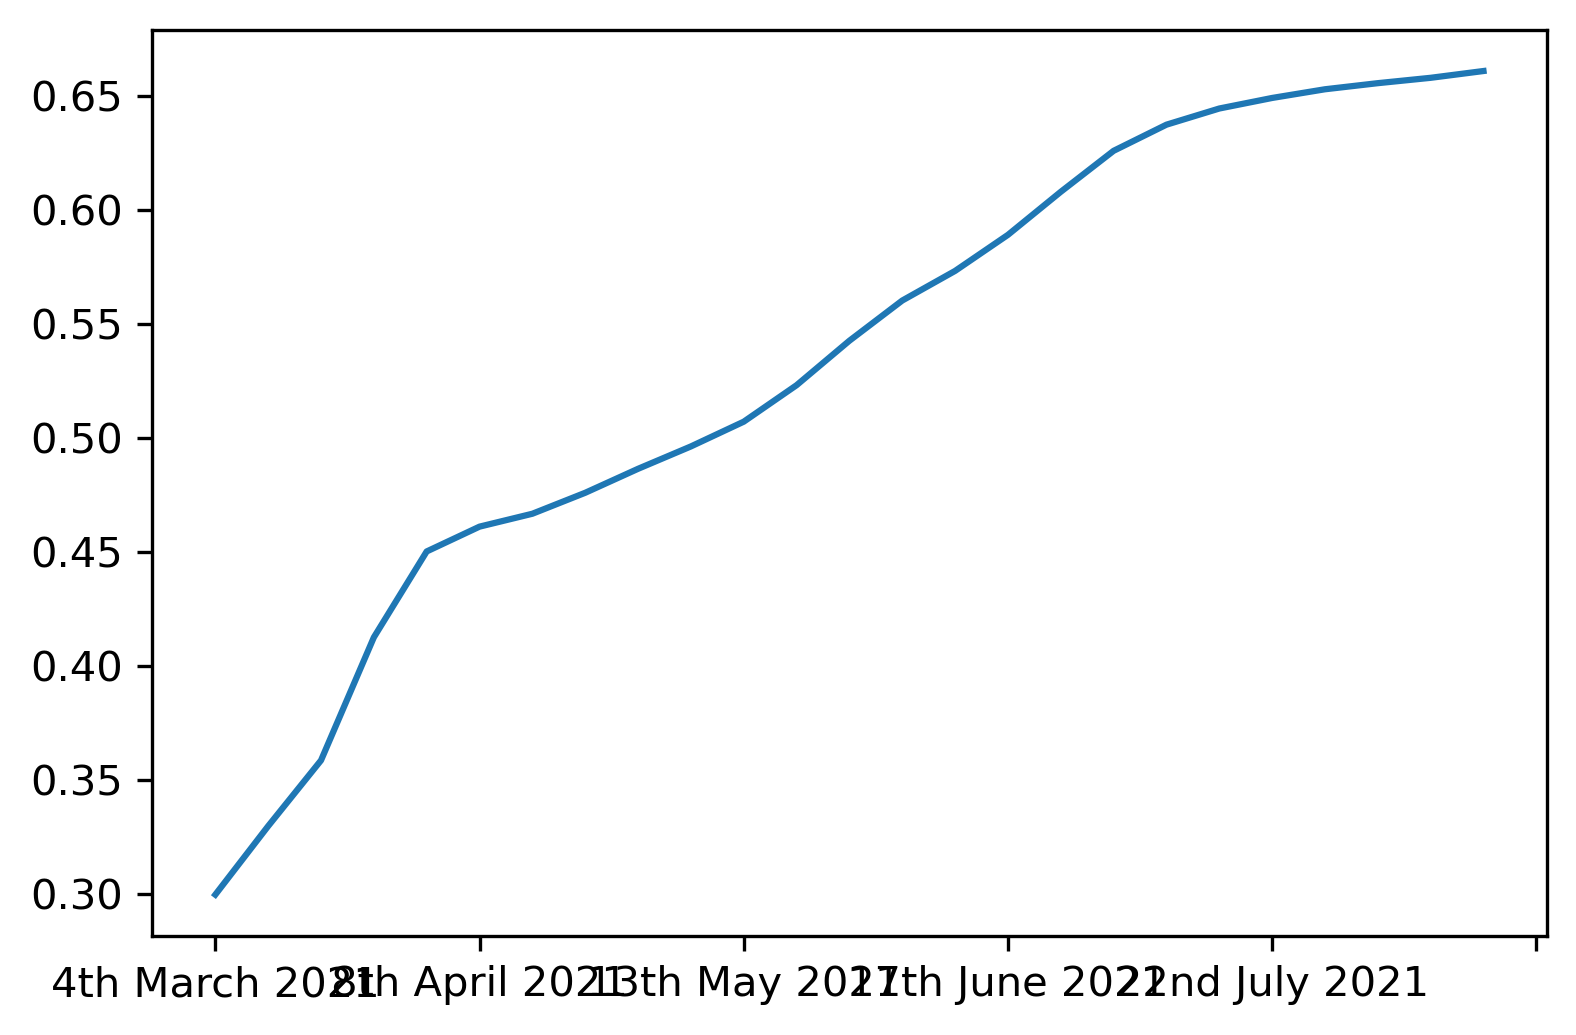

In [29]:
complete_weekly_la_vac1_prop_data.mean(axis=1).plot(legend=False)

In [30]:
complete_weekly_la_vac1_prop_data['Barnet']

4th March 2021      0.249924
11th March 2021     0.281994
18th March 2021     0.300254
25th March 2021     0.324717
1st April 2021      0.358404
8th April 2021      0.366151
15th April 2021     0.370073
22nd April 2021     0.375971
29th April 2021     0.382679
6th May 2021        0.391171
13th May 2021       0.405904
20th May 2021       0.420788
27th May 2021       0.434868
3rd June 2021       0.451864
10th June 2021      0.467771
17th June 2021      0.484354
24th June 2021      0.501805
1st July 2021       0.517587
8th July 2021       0.528480
15th July 2021      0.535999
22nd July 2021      0.540426
29th July 2021      0.544137
5th August 2021     0.546903
12th August 2021    0.549756
19th August 2021    0.551980
Name: Barnet, dtype: float64

In [31]:
#convert dates to correct date format date/month/year
complete_weekly_la_vac1_prop_data.index = pd.to_datetime(
    complete_weekly_la_vac1_prop_data.index,infer_datetime_format=True)

In [32]:
complete_weekly_la_vac1_prop_data.head(2)

,Adur,Allerdale,Amber Valley,Arun,Ashfield,Ashford,Babergh,Barking and Dagenham,Barnet,Barnsley,...,Wirral,Woking,Wokingham,Wolverhampton,Worcester,Worthing,Wychavon,Wyre,Wyre Forest,York
2021-03-04,0.357475,0.339799,0.337312,0.382071,0.352127,0.285724,0.406057,0.164430,0.249924,0.273114,...,0.352556,0.255150,0.255971,0.252882,0.323451,0.358657,0.378308,0.426317,0.380165,0.284475
2021-03-11,0.385242,0.373192,0.372917,0.419499,0.385383,0.316354,0.439397,0.191407,0.281994,0.303455,...,0.380408,0.278191,0.280292,0.285412,0.354277,0.384142,0.409635,0.463513,0.409830,0.315036


In [33]:
#function that takes in dates(as index) and cumulative vaccine rates (as data) and spits out the date and %
#at which the curve starts to 'tail off'
 
def asymptote_date_and_value(column, asymptote_value):
    new_column = list(column)
    N = 500
    difflist = new_column[::-1]

    for i,val in enumerate(difflist[:-1]):
        diff = difflist[i]-difflist[i+1]
        if diff < asymptote_value:
            N = i
        else:
            break
    
    if N == 500:
        return False, False
    else:
        return column.index[-(N+2)], column[-(N+2)]

In [34]:
hesitancy_measure = []
for i in range(0,len(complete_weekly_la_vac1_prop_data.columns)):
    date, value = asymptote_date_and_value(
        column=complete_weekly_la_vac1_prop_data.iloc[:,i], asymptote_value=0.01)
    hesitancy_measure.append(value)

In [35]:
hesitancy_measure

[0.6900587404267975,
 0.7219000579895619,
 0.7026453323524453,
 0.6874931225204877,
 0.6567594874699569,
 0.6479510113824826,
 0.7052169704112126,
 0.43617180575734643,
 0.5284801136363636,
 0.6498376534894766,
 0.6819399709260896,
 0.6017538252566818,
 0.6626736918229248,
 0.6703631450181493,
 0.6603637140180838,
 0.5878339133201679,
 0.5885347216585693,
 0.46808635361975437,
 0.6671181752737468,
 0.5495601102864217,
 0.6212744925896301,
 0.6719530454572678,
 0.5728517627727727,
 0.5373074101247248,
 0.6298482351880825,
 0.6304520582158345,
 0.5244450831602395,
 0.6664790371443209,
 0.683899546984469,
 0.464134172256792,
 0.6551234673649691,
 0.6025289746016477,
 0.5921948074736979,
 0.7302302966008045,
 0.6141292629586382,
 0.6883099352051836,
 0.5966329774072594,
 0.6685981354961357,
 0.6439573185273897,
 0.5709888144994971,
 0.5972892047076124,
 0.625127855438118,
 0.5317688586743365,
 0.49094411410108846,
 0.6915365637220007,
 0.6396443242681088,
 0.6703004261489223,
 0.6691699979

In [36]:
imd_df = merged[['IMD: Overall - extent (%)',
                  'IMD: Barriers to Housing and Services',
                  'IMD: Crime',
                  'IMD: Education Skills and Training Deprivation',
                  'IMD: Employment',
                  'IMD: Health Deprivation and Disability',
                  'IMD: Income Deprivation',
                  'IMD: Living Environment Deprivation',]]
imd_df = imd_df.sort_index()

In [37]:
d = {complete_weekly_la_vac1_prop_data.columns[i]: hesitancy_measure[i] for i in range(len(complete_weekly_la_vac1_prop_data.columns))}
hesitancy_df = pd.DataFrame.from_dict(d,orient='index',columns=['hesitancy measure'])
hesitancy_by_imd_df = pd.concat([imd_df,hesitancy_df], join='inner',axis=1)
hesitancy_by_imd_df = hesitancy_by_imd_df[hesitancy_by_imd_df['hesitancy measure'] != 0]
hesitancy_by_imd_df = hesitancy_by_imd_df.apply(pd.to_numeric, args=('coerce',))

In [38]:
hesitancy_by_imd_df

,IMD: Overall - extent (%),IMD: Barriers to Housing and Services,IMD: Crime,IMD: Education Skills and Training Deprivation,IMD: Employment,IMD: Health Deprivation and Disability,IMD: Income Deprivation,IMD: Living Environment Deprivation,hesitancy measure
Adur,7.9,0.00,0.00,7.14,0.00,0.00,0.00,0.00,0.690059
Allerdale,19.9,13.33,0.00,18.33,13.33,11.67,10.00,21.67,0.721900
Amber Valley,11.0,2.56,0.00,11.54,3.85,5.13,3.85,3.85,0.702645
Arun,10.5,7.45,4.26,8.51,3.19,5.32,1.06,2.13,0.687493
Ashfield,26.0,0.00,9.46,22.97,20.27,13.51,13.51,0.00,0.656759
...,...,...,...,...,...,...,...,...,...
Worthing,7.2,0.00,3.08,3.08,3.08,3.08,0.00,9.23,0.683836
Wychavon,3.8,29.49,3.85,5.13,1.28,0.00,0.00,7.69,0.703217
Wyre,15.9,0.00,7.25,10.14,13.04,17.39,14.49,7.25,0.698887
Wyre Forest,21.0,15.38,6.15,10.77,6.15,1.54,4.62,10.77,0.686850


In [39]:
hesitancy_by_imd_df.to_csv('hesitancy_by_imd_df_file.csv',index=True)

C:\Users\joshb\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


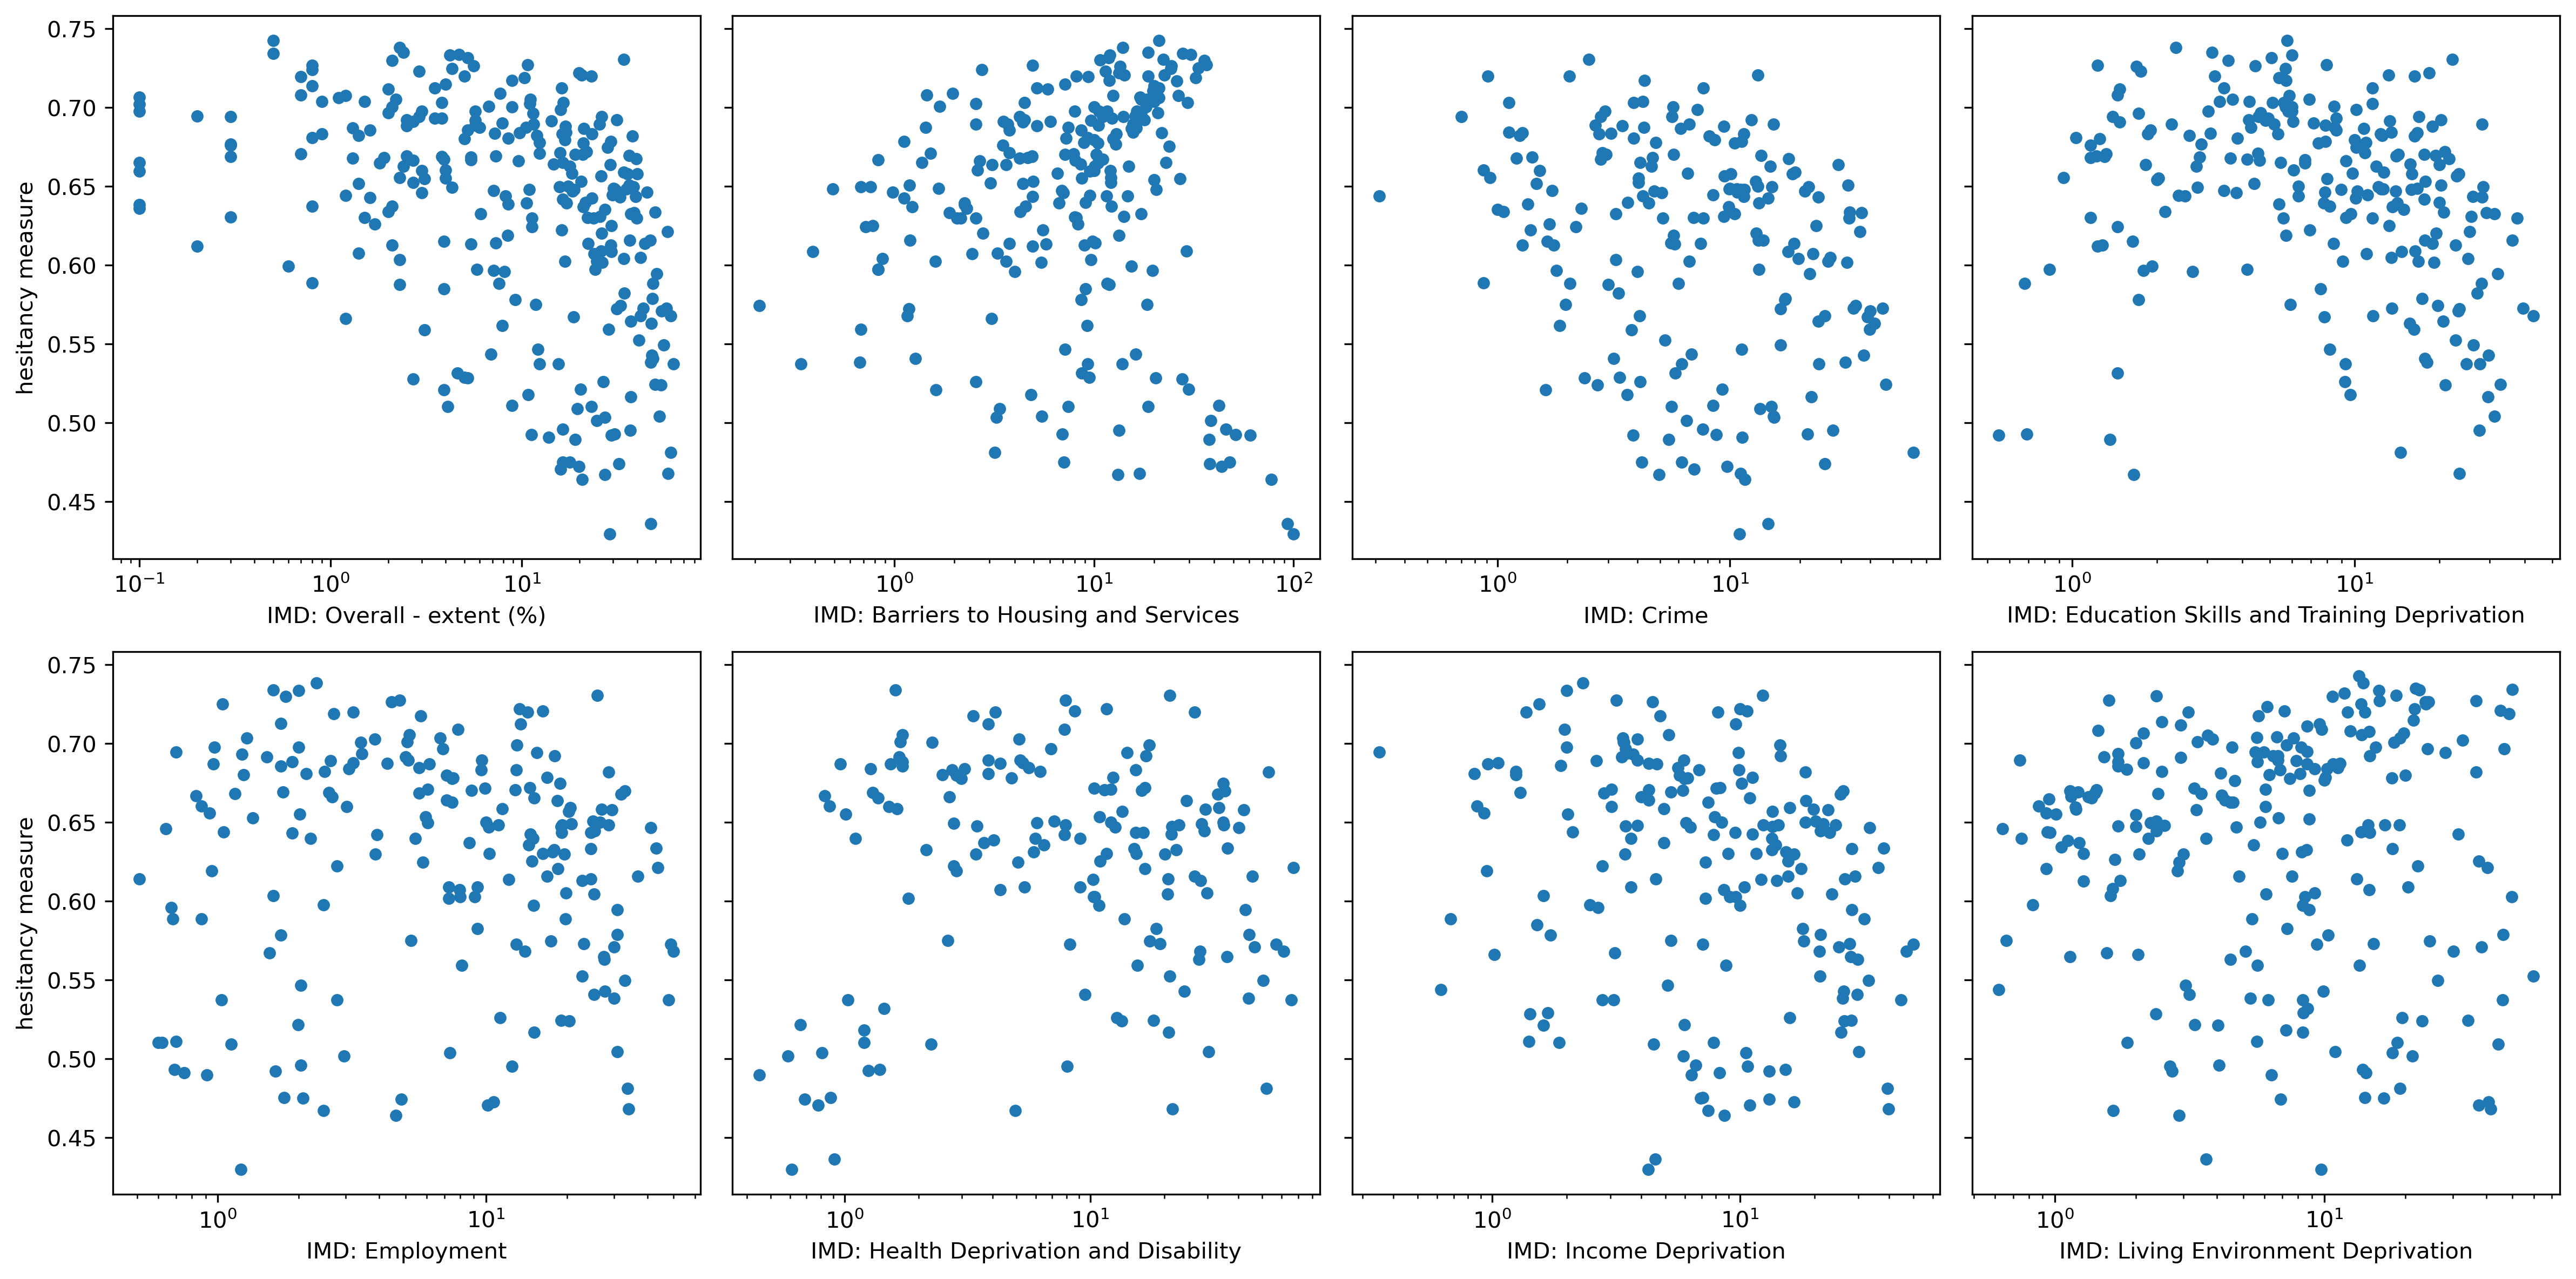

In [40]:
#create subplot figure with having side by side plots
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(16,8),dpi=300,sharey=True, tight_layout=True)
#fig.suptitle('Relationships between vaccine hesitancy and IMD metrics',fontsize=39)
#for i in range(2):
#    for j in range(4):
#        axes[i][j].invert_xaxis()

# plot second pandas frame in subplot style
hesitancy_by_imd_df.plot.scatter(
    'IMD: Overall - extent (%)', 'hesitancy measure',ax = axes[0][0], subplots=True, logx=True)

# plot second pandas frame in subplot style
hesitancy_by_imd_df.plot.scatter(
    'IMD: Barriers to Housing and Services', 'hesitancy measure',ax = axes[0][1], subplots=True, logx=True)

# plot third pandas frame in subplot style
hesitancy_by_imd_df.plot.scatter('IMD: Crime', 'hesitancy measure',ax = axes[0][2], subplots=True, logx=True)

# plot third pandas frame in subplot style
hesitancy_by_imd_df.plot.scatter(
    'IMD: Education Skills and Training Deprivation', 'hesitancy measure',ax = axes[0][3], subplots=True, logx=True)

# plot third pandas frame in subplot style
hesitancy_by_imd_df.plot.scatter(
    'IMD: Employment', 'hesitancy measure',ax = axes[1][0], subplots=True, logx=True)

# plot third pandas frame in subplot style
hesitancy_by_imd_df.plot.scatter(
    'IMD: Health Deprivation and Disability', 'hesitancy measure',ax = axes[1][1], subplots=True, logx=True)

# plot third pandas frame in subplot style
hesitancy_by_imd_df.plot.scatter(
    'IMD: Income Deprivation', 'hesitancy measure',ax = axes[1][2], subplots=True, logx=True)

# plot third pandas frame in subplot style
hesitancy_by_imd_df.plot.scatter(
    'IMD: Living Environment Deprivation', 'hesitancy measure',ax = axes[1][3], subplots=True, logx=True)

plt.tight_layout()
plt.savefig('./Desktop/MSc Project/Outputs/Relationships between vaccine hesitancy and IMD metrics_figure.png')
plt.show()

In [41]:
cols = ['IMD: Overall - extent (%)',
        'IMD: Barriers to Housing and Services',
        'IMD: Crime',
        'IMD: Education Skills and Training Deprivation',
        'IMD: Employment',
        'IMD: Health Deprivation and Disability',
        'IMD: Income Deprivation',
        'IMD: Living Environment Deprivation',]

cor_nums = {}

for col in cols:
    col1 = col
    col2 = 'hesitancy measure'
    df1 = hesitancy_by_imd_df[[col1,col2]]
    cor_num = df1.corr(method='pearson').iloc[1][0]
    cor_nums[col1] = -cor_num
    #print('Pearsons correlation coefficient for', col1, 'and' , col2, ':', "{:.2f}".format(cor_num))
    
vac_hes_by_imd_cor_nums_df = pd.DataFrame.from_dict(orient='index', data=cor_nums)
vac_hes_by_imd_cor_nums_df.columns = ['Pearsons correlation coefficient against hesitancy measure']
vac_hes_by_imd_cor_nums_df = vac_hes_by_imd_cor_nums_df.sort_values(by='Pearsons correlation coefficient against hesitancy measure')

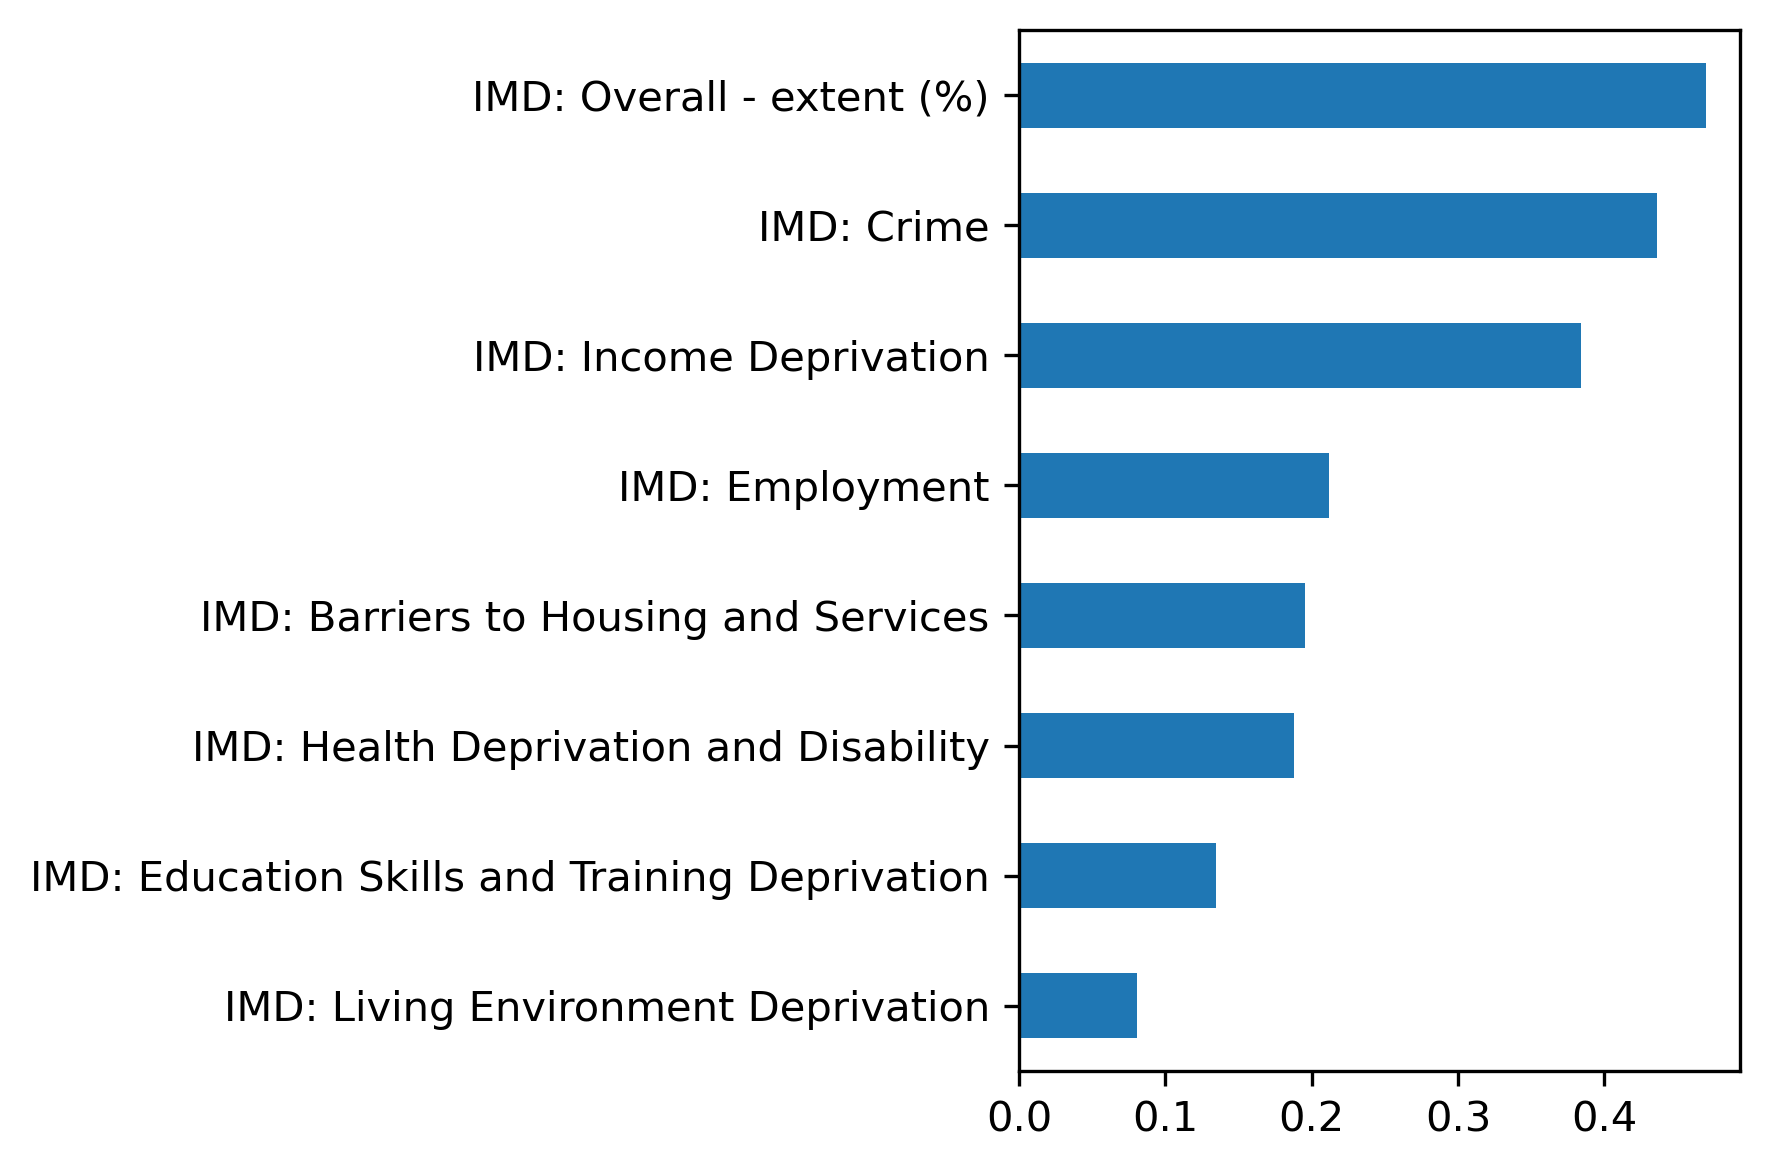

In [42]:
title='Vaccine hesitancy compared to IMD metrics'

vac_hes_by_imd_cor_nums_df.plot.barh(legend=None)

plt.tight_layout()
plt.savefig('./Desktop/MSc Project/Outputs/' + title + '.png')
plt.show()

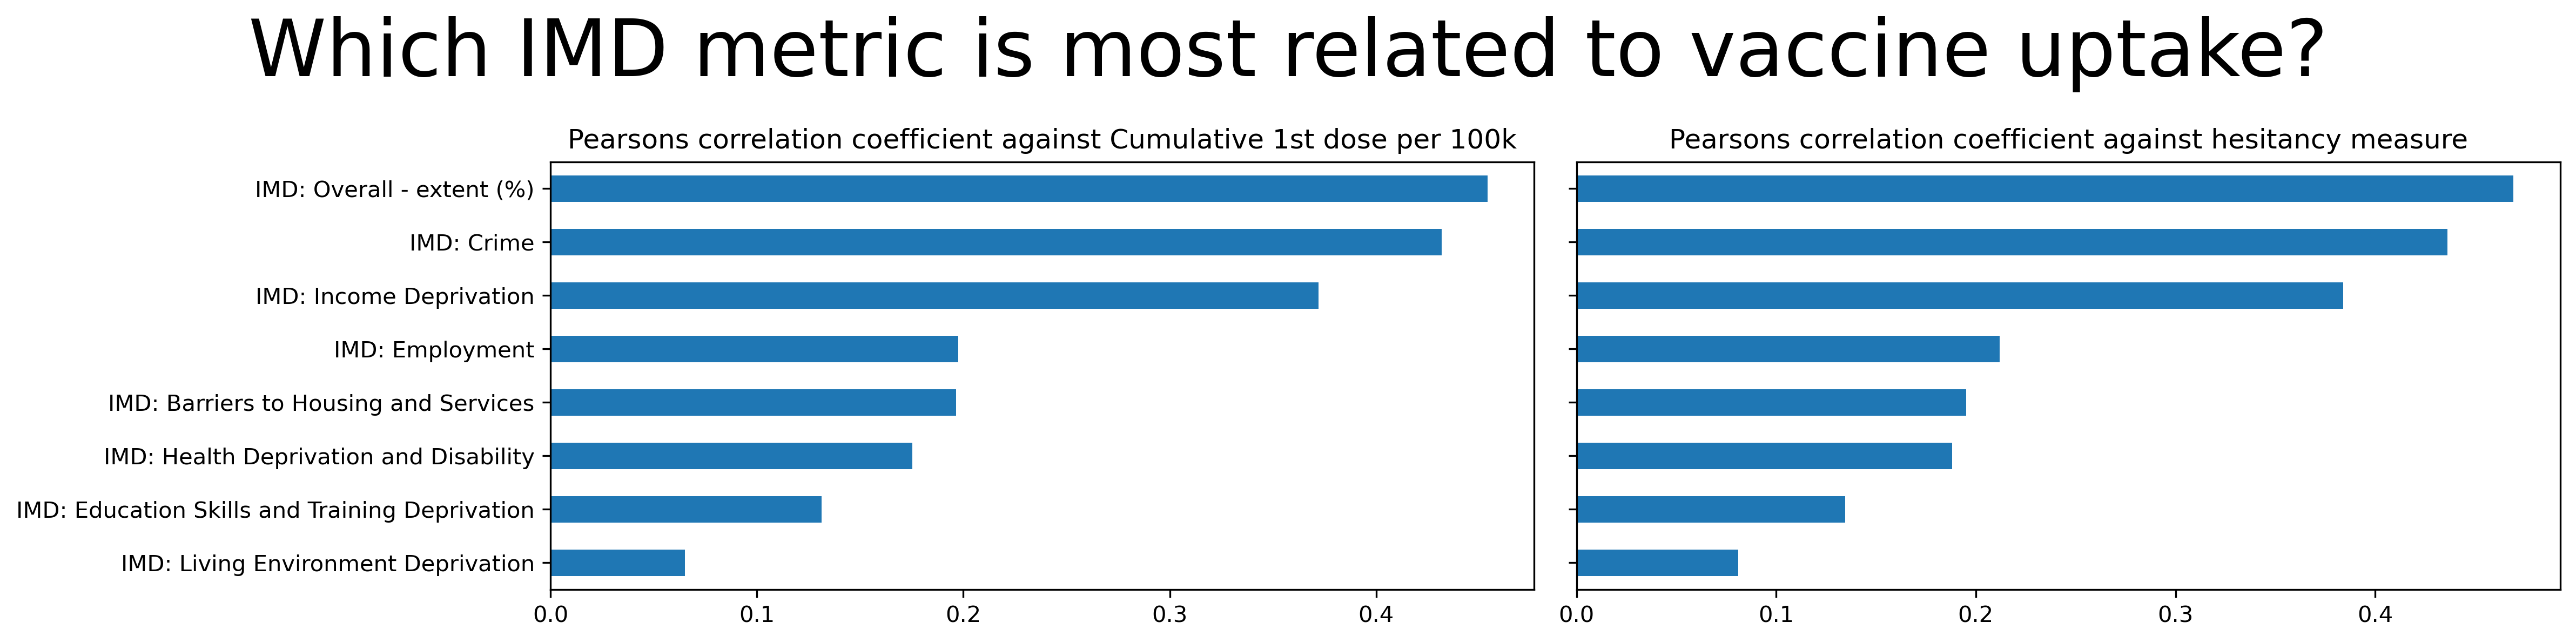

In [43]:
#create subplot figure with having side by side plots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,4),dpi=300,sharey=True, tight_layout=True)
fig.suptitle('Which IMD metric is most related to vaccine uptake?',fontsize=35)

# plot second pandas frame in subplot style
vac1_by_imd_cor_nums_df.plot.barh(ax = axes[0],legend=None, subplots=True)

# plot third pandas frame in subplot style
vac_hes_by_imd_cor_nums_df.plot.barh(ax = axes[1],legend=None, subplots=True)

plt.savefig('./Desktop/MSc Project/Outputs/Which IMD metric is most related to vaccine uptake_figure.png')
plt.show()

In [44]:
test = pd.concat([hesitancy_by_imd_df.iloc[:,-1],merged['Cumulative 1st dose per 100k']],join='inner',axis=1)
test.columns

Index(['hesitancy measure', 'Cumulative 1st dose per 100k'], dtype='object')

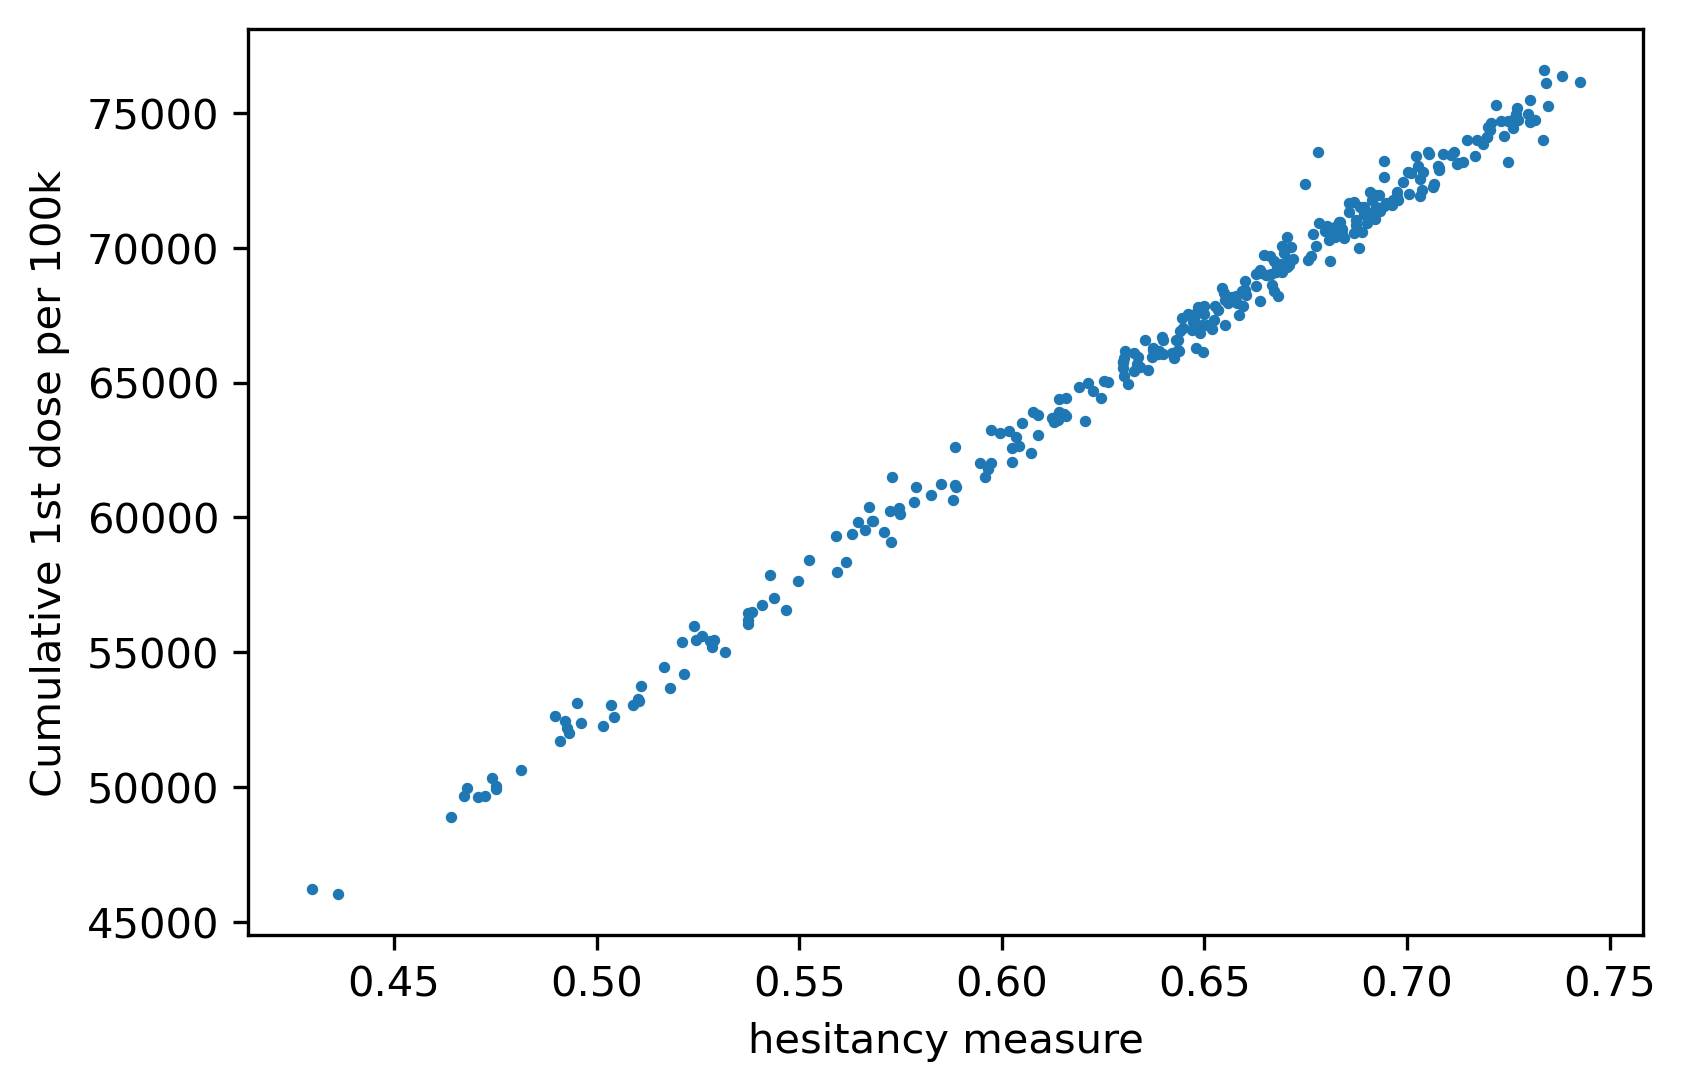

In [45]:
test.plot.scatter(x='hesitancy measure',y='Cumulative 1st dose per 100k',s=3)
plt.savefig('./Desktop/MSc Project/Outputs/hesitancy measure vs Cumulative 1st dose per 100k_figure.png')
plt.show()

In [46]:
test.corr().iloc[0][1]

0.9969034648027054